### **Exploración de datos de COVID-19 en Argentina**

Se utilizan los datos del Ministerio de salud de la republica Argentina

In [1]:
import numpy as np
import os
import pandas as pd 
#import unidecode
import unicodedata
import datetime
import random
import datetime
from datetime import datetime, date, timedelta
import math
from math import sqrt
from matplotlib import pyplot as plt
import scipy.stats as stats

### Importo los datos de COVID-19 del Ministerio de Salud

http://datos.salud.gob.ar/dataset/covid-19-casos-registrados-en-la-republica-argentina

In [2]:
import urllib.request
url = ' https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv'
filename = 'Covid19Casos.csv'
urllib.request.urlretrieve(url, filename)

('Covid19Casos.csv', <http.client.HTTPMessage at 0x7f98920ebef0>)

In [3]:

cases = pd.read_csv('Covid19Casos.csv', sep=',',encoding='utf-8')

### Exploramos la data

In [4]:
#Cantidad de casos
cant_casos = len(cases)
print(f'Cantidad de datos (personas testeadas): {cant_casos:,}')

Cantidad de datos (personas testeadas): 3,961,380


In [5]:
# Primeras 5 filas
cases[:5]

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-12-12
1,1000002,M,21.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-12-12
2,1000003,F,41.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-12-12
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-12-12
4,1000006,M,28.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,6,NaN,515,2020-12-12


In [6]:
# Todos los datos exactos de un registro
cases.iloc[75061]

id_evento_caso                                                                1092112
sexo                                                                                M
edad                                                                               34
edad_años_meses                                                                  Años
residencia_pais_nombre                                                      Argentina
residencia_provincia_nombre                                              Buenos Aires
residencia_departamento_nombre                                             Avellaneda
carga_provincia_nombre                                                   Buenos Aires
fecha_inicio_sintomas                                                      2020-06-13
fecha_apertura                                                             2020-06-16
sepi_apertura                                                                      25
fecha_internacion                                     

In [7]:
start_date = date(2020,3,1)
today= datetime.now().date()
total_days = (today - start_date).days
print(today)

2020-12-13


In [8]:

seleccionados = cases.loc[(cases['clasificacion_resumen'] == 'Confirmado')]
seleccionados.reset_index()
len(seleccionados)

1494598

In [9]:
seleccionados['fecha_apertura'] = pd.to_datetime(seleccionados['fecha_apertura'])
seleccionados['fecha_apertura'] = seleccionados['fecha_apertura'].dt.date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
casos_por_dia = []
for i in range(total_days):
    day = start_date + timedelta(days=i)
    casos_por_dia.append([day, len(seleccionados.loc[seleccionados['fecha_apertura'] == day])])

No handles with labels found to put in legend.


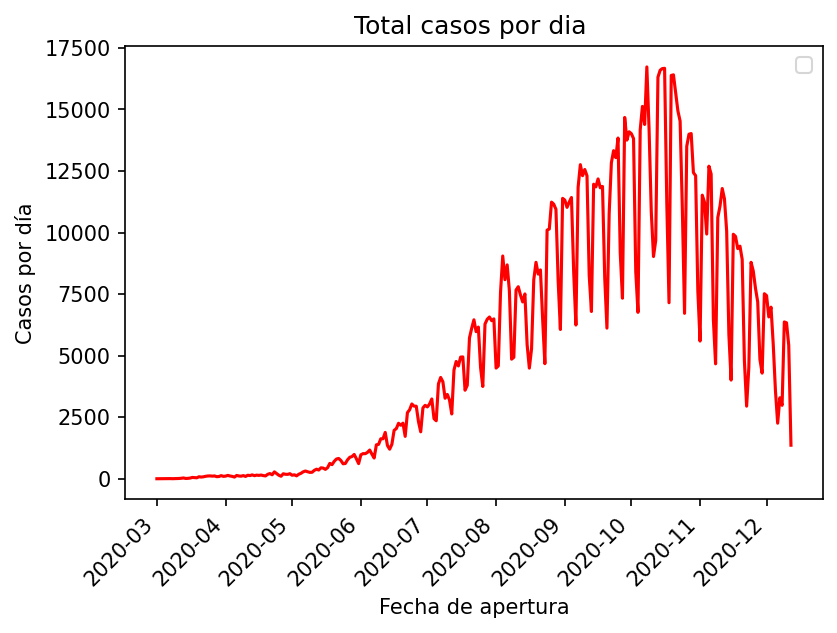

In [11]:
#grafico casos por dia en el tiempo
plt.figure(dpi=150)
plt.plot([x[0] for x in casos_por_dia],[x[1] for x in casos_por_dia], 'r-')
plt.ylabel('Casos por día')
plt.xlabel('Fecha de apertura')
plt.xticks(rotation=45, ha='right')
plt.title('Total casos por dia ')
plt.legend()
plt.show()

### Suavización aproximada de la curva anterior

No handles with labels found to put in legend.


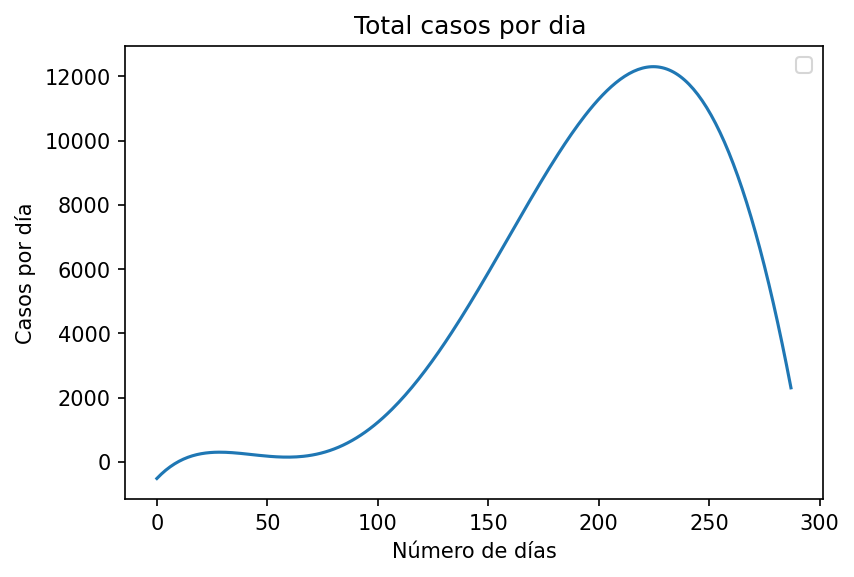

In [12]:
#suavizo la curva 
positivos_por_dia = []
for i in range(total_days):
  day = start_date + timedelta(days=i)
  positivos_por_dia.append(len(seleccionados.loc[seleccionados['fecha_apertura'] == day]))

xx = np.linspace(0, total_days, total_days)

poly = np.polyfit(xx, positivos_por_dia, 5)
poly_y = np.poly1d(poly)(xx)
plt.figure(dpi=150)
plt.plot(xx,poly_y)
plt.xlabel('Número de días')
plt.ylabel('Casos por día')
plt.title('Total casos por dia ')
plt.legend()
plt.show()


plt.show()

### Cuál será la probabilidad de ser positivo si te hacen el análisis ?
(índice de positividad)

In [13]:
negativos = len(cases.loc[cases['clasificacion_resumen'] == 'Descartado'])
positivos = len(cases.loc[cases['clasificacion_resumen'] == 'Confirmado'])
print(f'Positivos: {positivos}, Negativos: {negativos}')


import time
print(f'*datos al dia {time.strftime("%d/%m/%y")}')

Positivos: 1494598, Negativos: 2169975
*datos al dia 13/12/20


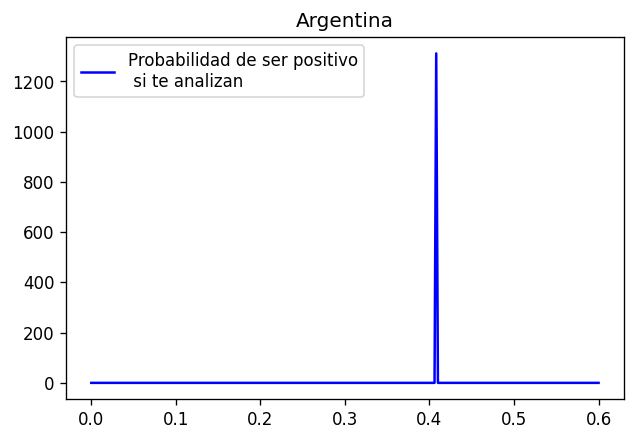

In [29]:
xs = np.linspace(0,0.6,301)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=positivos+1, b=negativos+1),'b-',label='Probabilidad de ser positivo\n si te analizan')
plt.title('Argentina')
plt.legend(loc=0)
plt.show()

### Probabilidad marginalizada sobre el sexo

In [15]:

negativosM = len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['sexo'] == 'M')])
positivosM = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'M')])

negativosF = len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['sexo'] == 'F')])
positivosF = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'F')])


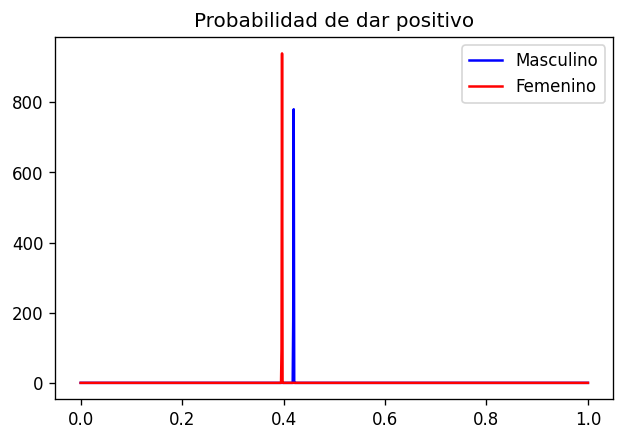

In [16]:
xs = np.linspace(0,1,1001)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=positivosM+1, b=negativosM+1),'b-',label='Masculino')
plt.plot(xs, stats.beta.pdf(xs,a=positivosF+1, b=negativosF+1),'r-',label='Femenino')
plt.title('Probabilidad de dar positivo')
plt.legend(loc=1)
plt.show()

### Probabilidad de tener cierta edad si el test da positivo

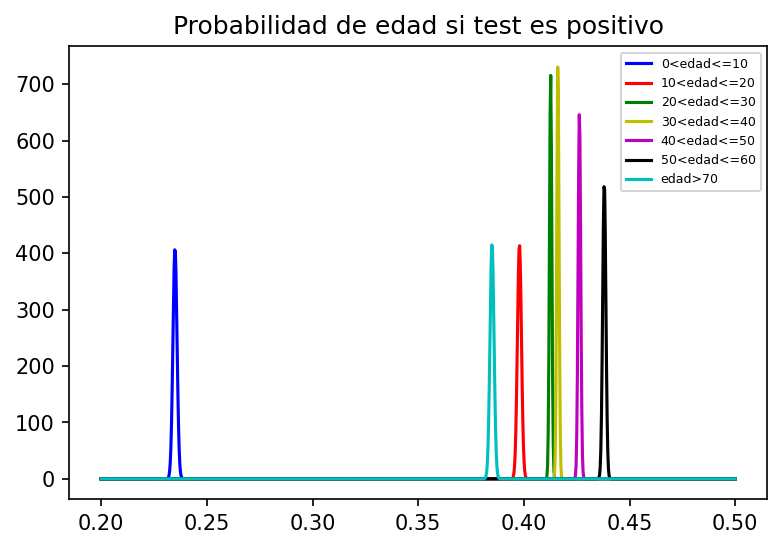

In [30]:
#0<edad<=10
positivos_0a10 =len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['edad'] > 0) & (cases['edad'] <= 10)])
negativos_0a10 =len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['edad'] > 0) & (cases['edad'] <= 10)])
#10<edad<=20
positivos_10a20 =len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['edad'] > 10) & (cases['edad'] <= 20)])
negativos_10a20 =len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['edad'] > 10) & (cases['edad'] <= 20)])
#20<edad<=30
positivos_20a30 =len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['edad'] > 20) & (cases['edad'] <= 30)])
negativos_20a30 =len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['edad'] > 20) & (cases['edad'] <= 30)])
#30<edad<=40
positivos_30a40 =len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['edad'] > 30) & (cases['edad'] <= 40)])
negativos_30a40 =len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['edad'] > 30) & (cases['edad'] <= 40)])
#40<edad<=50
positivos_40a50 =len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['edad'] > 40) & (cases['edad'] <= 50)])
negativos_40a50 =len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['edad'] > 40) & (cases['edad'] <= 50)])
#50<edad<=60
positivos_50a60 =len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['edad'] > 50) & (cases['edad'] <= 60)])
negativos_50a60 =len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['edad'] > 50) & (cases['edad'] <= 60)])
#edad>70
positivos_70a =len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['edad'] > 70) & (cases['edad'] < 160)])
negativos_70a =len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['edad'] > 70) & (cases['edad'] < 160)])

#dist beta y graficos
xe = np.linspace(0.2,0.5,1001)
plt.figure(dpi=150)
plt.plot(xe, stats.beta.pdf(xe,a=positivos_0a10+1, b=negativos_0a10+1),'b-',label='0<edad<=10')
plt.plot(xe, stats.beta.pdf(xe,a=positivos_10a20+1, b=negativos_10a20+1),'r-',label='10<edad<=20')
plt.plot(xe, stats.beta.pdf(xe,a=positivos_20a30+1, b=negativos_20a30+1),'g-',label='20<edad<=30')
plt.plot(xe, stats.beta.pdf(xe,a=positivos_30a40+1, b=negativos_30a40+1),'y-',label='30<edad<=40')
plt.plot(xe, stats.beta.pdf(xe,a=positivos_40a50+1, b=negativos_40a50+1),'m-',label='40<edad<=50')
plt.plot(xe, stats.beta.pdf(xe,a=positivos_50a60+1, b=negativos_50a60+1),'k-',label='50<edad<=60')
plt.plot(xe, stats.beta.pdf(xe,a=positivos_70a+1, b=negativos_70a+1),'c-',label='edad>70')
plt.title('Probabilidad de edad si test es positivo')
plt.legend(loc=0,  prop={'size': 6})
plt.show()

### Exploremos las localidades

In [17]:
todas = cases['residencia_departamento_nombre'].tolist()
unicas = list(dict.fromkeys(todas))
print(sorted(unicas))

['12 de Octubre', '1º de Mayo', '2 de Abril', '25 de Mayo', '9 de Julio', 'Adolfo Alsina', 'Adolfo Gonzales Chaves', 'Aguirre', 'Albardón', 'Alberdi', 'Alberti', 'Almirante Brown', 'Aluminé', 'Ambato', 'Ancasti', 'Andalgalá', 'Angaco', 'Anta', 'Antofagasta de la Sierra', 'Antártida Argentina', 'Apóstoles', 'Arauco', 'Arrecifes', 'Atamisqui', 'Atreucó', 'Avellaneda', 'Ayacucho', 'Azul', 'Añelo', 'Bahía Blanca', 'Balcarce', 'Banda', 'Baradero', 'Bariloche', 'Belgrano', 'Bella Vista', 'Belén', 'Benito Juárez', 'Berazategui', 'Berisso', 'Bermejo', 'Berón de Astrada', 'Biedma', 'Bolívar', 'Bragado', 'Brandsen', 'Burruyacú', 'COMUNA 01', 'COMUNA 02', 'COMUNA 03', 'COMUNA 04', 'COMUNA 05', 'COMUNA 06', 'COMUNA 07', 'COMUNA 08', 'COMUNA 09', 'COMUNA 10', 'COMUNA 11', 'COMUNA 12', 'COMUNA 13', 'COMUNA 14', 'COMUNA 15', 'Cachi', 'Cafayate', 'Cainguás', 'Calamuchita', 'Caleu Caleu', 'Calingasta', 'Campana', 'Candelaria', 'Capayán', 'Capital', 'Capitán Sarmiento', 'Carlos Casares', 'Carlos Tejedor

In [18]:

localidad = 'COMUNA 10'

negativosM = len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['sexo'] == 'M') & (cases['residencia_departamento_nombre'].str.contains(localidad))])
positivosM = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'M') & (cases['residencia_departamento_nombre'].str.contains(localidad))])

negativosF = len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['sexo'] == 'F') & (cases['residencia_departamento_nombre'].str.contains(localidad))])
positivosF = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'F') & (cases['residencia_departamento_nombre'].str.contains(localidad))])


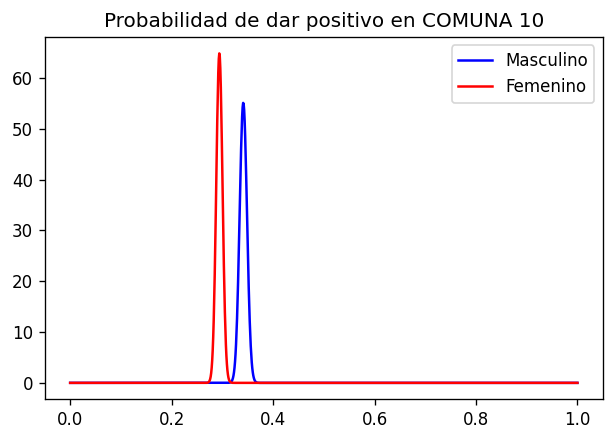

In [19]:

xs = np.linspace(0,1,1001)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=positivosM+1, b=negativosM+1),'b-',label='Masculino')
plt.plot(xs, stats.beta.pdf(xs,a=positivosF+1, b=negativosF+1),'r-',label='Femenino')
plt.title('Probabilidad de dar positivo en '+localidad)
plt.legend(loc=1)
plt.show()

### Probabilidad de fallecer 

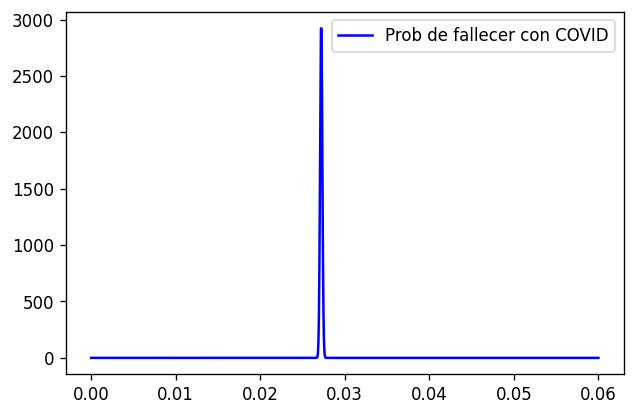

In [34]:
xs = np.linspace(0, 0.06, 1001)
fallece = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'SI')])
no_fallece = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'NO')])

#dist beta y grafico
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=fallece+1, b=no_fallece+1),'b-',label='Prob de fallecer con COVID')
plt.legend(loc=1)
plt.show()

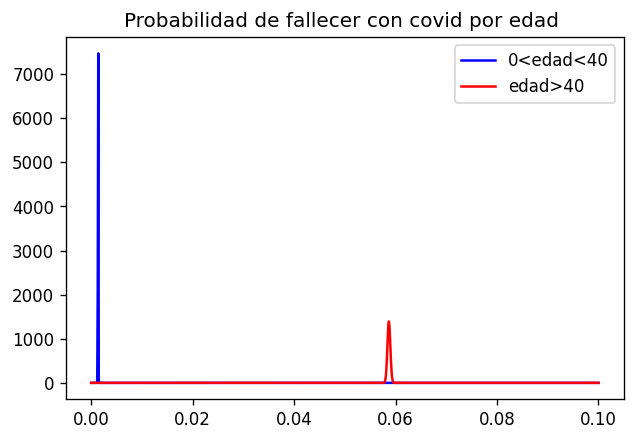

In [33]:
#prob de fallecer por edad 
xs = np.linspace(0, 0.1, 1001)
#0<edad<40
fallece_0a40= len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'SI') & (cases['edad'] > 0) & (cases['edad'] <= 40)])
no_fallece_0a40 = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'NO') & (cases['edad'] > 0) & (cases['edad'] <= 40) ])

#edad>40
fallece_40a= len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'SI') & (cases['edad'] > 40) ])
no_fallece_40a = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'NO') & (cases['edad'] > 40)  ])

#dist beta y grafico
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=fallece_0a40+1, b=no_fallece_0a40+1),'b-',label='0<edad<40')
plt.plot(xs, stats.beta.pdf(xs,a=fallece_40a+1, b=no_fallece_40a+1),'r-',label='edad>40')
plt.title('Probabilidad de fallecer con covid por edad ')
plt.legend(loc=0)
plt.show()